<a href="https://colab.research.google.com/github/gojalifs/kmeans_clustering/blob/master/Copy_of_FIXXXX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kneed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [4]:
data = pd.read_excel('norm (2).xlsx')

data

,name,album,artist,release_date,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,Tunggu Apa Lagi,Tunggu Apa Lagi,Nyoman Paul,2024-09-05,219352,0.661,0.5130,0.649,0.003975,0.1530,-4.496,0.0317,124.963,0.539,4
1,Lampu Kuning,Nonfiksi,Juicy Luicy,2024-06-28,239416,0.540,0.7870,0.371,0.000000,0.2060,-8.268,0.0244,81.019,0.395,4
2,Mati-Matian,Mati-Matian,Mahalini,2024-03-29,244137,0.440,0.7950,0.389,0.009455,0.1490,-6.412,0.0368,116.839,0.176,4
3,Tampar,Nonfiksi,Juicy Luicy,2024-06-28,202824,0.460,0.6520,0.377,0.000000,0.0947,-9.024,0.0314,169.896,0.433,4
4,Keras Kepala,Hanya Figuran,Meiska,2024-07-12,296800,0.471,0.7630,0.489,0.001193,0.1050,-6.591,0.0375,118.831,0.182,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,VITAMIN U,VITAMIN U,Paul Partohap,2024-11-20,238303,0.651,0.0972,0.726,0.000806,0.2100,-6.527,0.0396,126.989,0.719,4
546,Jangan Pernah Berubah,Jangan Pernah Berubah,Coldiac,2024-06-28,238216,0.581,0.8320,0.804,0.000037,0.0958,-6.107,0.0572,143.909,0.387,4
547,Tak Ada Restu,Tak Ada Restu,Brisia Jodie,2024-09-06,224020,0.416,0.6320,0.549,0.000000,0.1300,-6.065,0.0415,125.148,0.287,4
548,DEEP DIVE,GOLDEN HOUR : Part.2,ATEEZ,2024-11-15,179187,0.785,0.0729,0.755,0.000000,0.1710,-3.909,0.0645,90.037,0.641,4


In [5]:
audio_features = ['danceability', 'acousticness', 'energy',
    'instrumentalness', 'speechiness', 'valence', 'liveness', 'tempo', 'loudness'
]
data_audio = data[audio_features]

print("Fitur yang dipilih setelah seleksi:", data_audio)

Fitur yang dipilih setelah seleksi:      danceability  acousticness  energy  instrumentalness  speechiness  \
0           0.661        0.5130   0.649          0.003975       0.0317   
1           0.540        0.7870   0.371          0.000000       0.0244   
2           0.440        0.7950   0.389          0.009455       0.0368   
3           0.460        0.6520   0.377          0.000000       0.0314   
4           0.471        0.7630   0.489          0.001193       0.0375   
..            ...           ...     ...               ...          ...   
545         0.651        0.0972   0.726          0.000806       0.0396   
546         0.581        0.8320   0.804          0.000037       0.0572   
547         0.416        0.6320   0.549          0.000000       0.0415   
548         0.785        0.0729   0.755          0.000000       0.0645   
549         0.776        0.3190   0.442          0.000013       0.0575   

     valence  liveness    tempo  loudness  
0      0.539    0.1530  124.963

In [6]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(data_audio) # Use data_audio for clustering
    wcss.append(kmeans.inertia_)

print("\nNilai WCSS untuk tiap K:")
for i, val in enumerate(wcss, start=1):
    print(f"K={i}: WCSS={val:.2f}")


Nilai WCSS untuk tiap K:
K=1: WCSS=330757.80
K=2: WCSS=127417.33
K=3: WCSS=57559.38
K=4: WCSS=37352.33
K=5: WCSS=21782.70
K=6: WCSS=15296.72
K=7: WCSS=12862.07
K=8: WCSS=10985.89
K=9: WCSS=8892.92
K=10: WCSS=7488.88



Elbow ditemukan pada K = 3


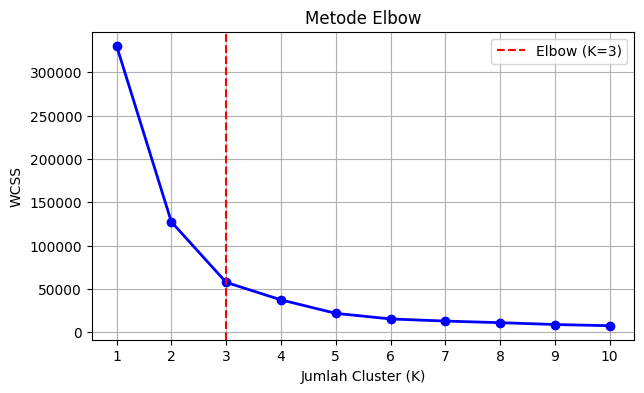

In [7]:
knee = KneeLocator(K_range, wcss, curve="convex", direction="decreasing")
elbow_k = knee.elbow
print(f"\nElbow ditemukan pada K = {elbow_k}")

plt.figure(figsize=(7, 4))
plt.plot(K_range, wcss, 'bo-', linewidth=2)
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow (K={elbow_k})')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.xticks(K_range)
plt.legend()
plt.show()

In [8]:
from sklearn.cluster import kmeans_plusplus

# Hitung centroid awal dengan metode k-means++
init_centroids, indices = kmeans_plusplus(data_audio.values, n_clusters=elbow_k, random_state=42)

# Tampilkan centroid awal
print(f"\nCentroid Awal (dari k-means++), untuk K={elbow_k}:")
for i, centroid in enumerate(init_centroids):
    print(f"Centroid {i}: {centroid}")


Centroid Awal (dari k-means++), untuk K=3:
Centroid 0: [ 6.860e-01  1.330e-01  7.610e-01  0.000e+00  4.260e-02  5.060e-01
  1.930e-01  9.698e+01 -6.931e+00]
Centroid 1: [ 4.210000e-01  8.250000e-01  5.250000e-01  1.321782e-03  4.720000e-02
  5.350000e-01  3.080000e-01  1.679270e+02 -1.035900e+01]
Centroid 2: [ 6.140e-01  8.020e-01  4.380e-01  0.000e+00  4.330e-02  3.020e-01
  2.130e-01  1.260e+02 -5.737e+00]


In [9]:
final_kmeans = KMeans(n_clusters=elbow_k, init='k-means++', random_state=42, n_init='auto')
cluster_labels = final_kmeans.fit_predict(data_audio)

data_filtered = data.loc[data.index].copy()
data_filtered['cluster'] = cluster_labels

print("\nJumlah data per cluster:")
print(data_filtered['cluster'].value_counts().sort_index())

output_filename = 'clustered_output.xlsx'
data_filtered.to_excel(output_filename, index=False)


Jumlah data per cluster:
cluster
0    168
1     93
2    289
Name: count, dtype: int64


In [10]:
data_filtered

,name,album,artist,release_date,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,cluster
0,Tunggu Apa Lagi,Tunggu Apa Lagi,Nyoman Paul,2024-09-05,219352,0.661,0.5130,0.649,0.003975,0.1530,-4.496,0.0317,124.963,0.539,4,2
1,Lampu Kuning,Nonfiksi,Juicy Luicy,2024-06-28,239416,0.540,0.7870,0.371,0.000000,0.2060,-8.268,0.0244,81.019,0.395,4,0
2,Mati-Matian,Mati-Matian,Mahalini,2024-03-29,244137,0.440,0.7950,0.389,0.009455,0.1490,-6.412,0.0368,116.839,0.176,4,2
3,Tampar,Nonfiksi,Juicy Luicy,2024-06-28,202824,0.460,0.6520,0.377,0.000000,0.0947,-9.024,0.0314,169.896,0.433,4,1
4,Keras Kepala,Hanya Figuran,Meiska,2024-07-12,296800,0.471,0.7630,0.489,0.001193,0.1050,-6.591,0.0375,118.831,0.182,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,VITAMIN U,VITAMIN U,Paul Partohap,2024-11-20,238303,0.651,0.0972,0.726,0.000806,0.2100,-6.527,0.0396,126.989,0.719,4,2
546,Jangan Pernah Berubah,Jangan Pernah Berubah,Coldiac,2024-06-28,238216,0.581,0.8320,0.804,0.000037,0.0958,-6.107,0.0572,143.909,0.387,4,1
547,Tak Ada Restu,Tak Ada Restu,Brisia Jodie,2024-09-06,224020,0.416,0.6320,0.549,0.000000,0.1300,-6.065,0.0415,125.148,0.287,4,2
548,DEEP DIVE,GOLDEN HOUR : Part.2,ATEEZ,2024-11-15,179187,0.785,0.0729,0.755,0.000000,0.1710,-3.909,0.0645,90.037,0.641,4,0


In [11]:
# Tampilkan jumlah iterasi yang dilakukan
print(f"\n🔁 Jumlah iterasi K-Means hingga konvergen: {final_kmeans.n_iter_}")


🔁 Jumlah iterasi K-Means hingga konvergen: 5


In [12]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# 1. Hitung jarak dari semua lagu ke masing-masing centroid awal
distances = euclidean_distances(data_audio.values, init_centroids)

# 2. Cari indeks lagu terdekat ke tiap centroid
closest_indices = np.argmin(distances, axis=0)

# 3. Tampilkan centroid beserta identitas lagu terdekatnya
print(f"\n🎯 Centroid Awal (K={elbow_k}) dan lagu terdekatnya:")
for i, (centroid, idx) in enumerate(zip(init_centroids, closest_indices)):
    print(f"\nCentroid {i}: {centroid}")
    print("→ Lagu terdekat:")
    # Use the index found from data_audio to access the original data
    print(data_filtered.iloc[idx][['name', 'artist']])


🎯 Centroid Awal (K=3) dan lagu terdekatnya:

Centroid 0: [ 6.860e-01  1.330e-01  7.610e-01  0.000e+00  4.260e-02  5.060e-01
  1.930e-01  9.698e+01 -6.931e+00]
→ Lagu terdekat:
name      XO (Only If You Say Yes) - Japanese Ver. / Dig...
artist                                              ENHYPEN
Name: 205, dtype: object

Centroid 1: [ 4.210000e-01  8.250000e-01  5.250000e-01  1.321782e-03  4.720000e-02
  5.350000e-01  3.080000e-01  1.679270e+02 -1.035900e+01]
→ Lagu terdekat:
name      The Prophecy
artist    Taylor Swift
Name: 394, dtype: object

Centroid 2: [ 6.140e-01  8.020e-01  4.380e-01  0.000e+00  4.330e-02  3.020e-01
  2.130e-01  1.260e+02 -5.737e+00]
→ Lagu terdekat:
name      Tak Dianggap
artist          Lyodra
Name: 34, dtype: object


In [13]:
data_filtered

,name,album,artist,release_date,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,cluster
0,Tunggu Apa Lagi,Tunggu Apa Lagi,Nyoman Paul,2024-09-05,219352,0.661,0.5130,0.649,0.003975,0.1530,-4.496,0.0317,124.963,0.539,4,2
1,Lampu Kuning,Nonfiksi,Juicy Luicy,2024-06-28,239416,0.540,0.7870,0.371,0.000000,0.2060,-8.268,0.0244,81.019,0.395,4,0
2,Mati-Matian,Mati-Matian,Mahalini,2024-03-29,244137,0.440,0.7950,0.389,0.009455,0.1490,-6.412,0.0368,116.839,0.176,4,2
3,Tampar,Nonfiksi,Juicy Luicy,2024-06-28,202824,0.460,0.6520,0.377,0.000000,0.0947,-9.024,0.0314,169.896,0.433,4,1
4,Keras Kepala,Hanya Figuran,Meiska,2024-07-12,296800,0.471,0.7630,0.489,0.001193,0.1050,-6.591,0.0375,118.831,0.182,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,VITAMIN U,VITAMIN U,Paul Partohap,2024-11-20,238303,0.651,0.0972,0.726,0.000806,0.2100,-6.527,0.0396,126.989,0.719,4,2
546,Jangan Pernah Berubah,Jangan Pernah Berubah,Coldiac,2024-06-28,238216,0.581,0.8320,0.804,0.000037,0.0958,-6.107,0.0572,143.909,0.387,4,1
547,Tak Ada Restu,Tak Ada Restu,Brisia Jodie,2024-09-06,224020,0.416,0.6320,0.549,0.000000,0.1300,-6.065,0.0415,125.148,0.287,4,2
548,DEEP DIVE,GOLDEN HOUR : Part.2,ATEEZ,2024-11-15,179187,0.785,0.0729,0.755,0.000000,0.1710,-3.909,0.0645,90.037,0.641,4,0


In [14]:
sil_score = silhouette_score(data_audio, cluster_labels)

print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5585


In [15]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(data_audio, cluster_labels)
print(f"Davies-Bouldin Index: {dbi:.4f}")

Davies-Bouldin Index: 0.5507


In [16]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_audio)

# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame for the PCA results
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

# Display the first few rows of the PCA results
display(data_pca_df.head())

# Display the explained variance ratio
print("\nExplained variance ratio:")
display(pd.DataFrame(pca.explained_variance_ratio_, index=[f'PC{i+1}' for i in range(pca.n_components_)], columns=['Explained Variance Ratio']))

# Display the cumulative explained variance
print("\nCumulative explained variance:")
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
display(pd.DataFrame(cumulative_explained_variance, index=[f'PC{i+1}' for i in range(pca.n_components_)], columns=['Cumulative Explained Variance']))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.009869,0.187517,0.010555,-0.147580,-0.283715,-0.868986,0.398243,0.843303,0.057442
1,-2.482322,-0.891725,-0.188357,1.499171,-0.726970,-0.580293,0.418784,0.307856,-0.026377
2,-2.557733,0.503828,-0.540555,0.175671,-0.417081,0.232148,0.629254,0.758827,-0.228016
3,-2.448588,0.805069,-0.133725,-1.283209,1.425531,-0.644275,0.189709,-0.385322,-0.171444
4,-2.211524,0.337742,-0.640677,-0.340392,-0.484771,0.277027,0.593798,0.646872,0.223182



Explained variance ratio:


,Explained Variance Ratio
PC1,0.354405
PC2,0.137640
PC3,0.119233
PC4,0.107930
PC5,0.095286
PC6,0.080873
PC7,0.051725
PC8,0.036171
PC9,0.016738



Cumulative explained variance:


,Cumulative Explained Variance
PC1,0.354405
PC2,0.492045
PC3,0.611278
PC4,0.719208
PC5,0.814494
PC6,0.895366
PC7,0.947091
PC8,0.983262
PC9,1.000000


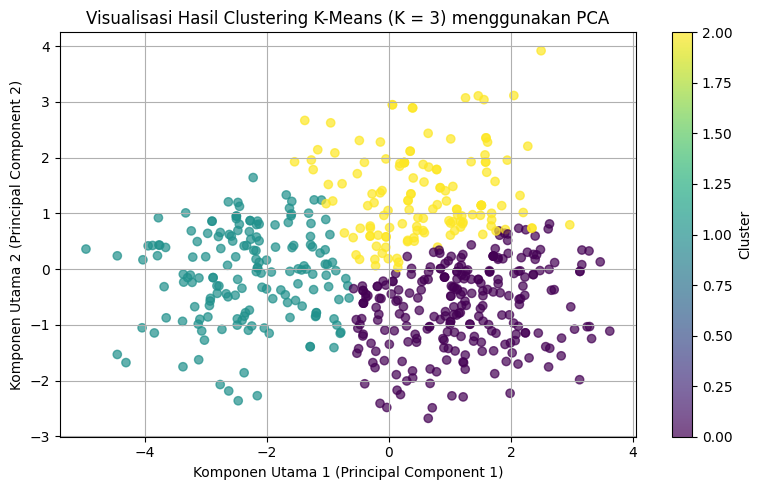

In [17]:
# --- IMPORT ---
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# --- PCA (2 dimensi) ---
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# --- CLUSTERING ULANG UNTUK VISUALISASI ---
kmeans = KMeans(n_clusters=elbow_k, init='k-means++', random_state=42, n_init='auto')
kmeans.fit(data_scaled)
labels = kmeans.labels_

# --- PLOT PCA 2D ---
plt.figure(figsize=(8, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)

# --- Customisasi Judul dan Label (Skripsi) ---
plt.title(f'Visualisasi Hasil Clustering K-Means (K = {elbow_k}) menggunakan PCA', fontsize=12)
plt.xlabel('Komponen Utama 1 (Principal Component 1)', fontsize=10)
plt.ylabel('Komponen Utama 2 (Principal Component 2)', fontsize=10)
plt.grid(True)
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


In [18]:
silhouette_scores = []
k_range = range(2, 11)  # Coba k dari 2 sampai 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled) # Use data_scaled instead of X
    score = silhouette_score(data_scaled, labels) # Use data_scaled instead of X
    silhouette_scores.append(score)
    print(f"Silhouette score untuk k = {k}: {score:.3f}")

avg_score = np.mean(silhouette_scores) # Corrected average calculation
print(f"\n📊 Rata-rata Silhouette Score dari k=2 sampai k=10: {avg_score:.3f}")

Silhouette score untuk k = 2: 0.255
Silhouette score untuk k = 3: 0.270
Silhouette score untuk k = 4: 0.188
Silhouette score untuk k = 5: 0.184
Silhouette score untuk k = 6: 0.186
Silhouette score untuk k = 7: 0.172
Silhouette score untuk k = 8: 0.173
Silhouette score untuk k = 9: 0.176
Silhouette score untuk k = 10: 0.156

📊 Rata-rata Silhouette Score dari k=2 sampai k=10: 0.195


In [19]:
data_filtered

,name,album,artist,release_date,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,cluster
0,Tunggu Apa Lagi,Tunggu Apa Lagi,Nyoman Paul,2024-09-05,219352,0.661,0.5130,0.649,0.003975,0.1530,-4.496,0.0317,124.963,0.539,4,2
1,Lampu Kuning,Nonfiksi,Juicy Luicy,2024-06-28,239416,0.540,0.7870,0.371,0.000000,0.2060,-8.268,0.0244,81.019,0.395,4,0
2,Mati-Matian,Mati-Matian,Mahalini,2024-03-29,244137,0.440,0.7950,0.389,0.009455,0.1490,-6.412,0.0368,116.839,0.176,4,2
3,Tampar,Nonfiksi,Juicy Luicy,2024-06-28,202824,0.460,0.6520,0.377,0.000000,0.0947,-9.024,0.0314,169.896,0.433,4,1
4,Keras Kepala,Hanya Figuran,Meiska,2024-07-12,296800,0.471,0.7630,0.489,0.001193,0.1050,-6.591,0.0375,118.831,0.182,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,VITAMIN U,VITAMIN U,Paul Partohap,2024-11-20,238303,0.651,0.0972,0.726,0.000806,0.2100,-6.527,0.0396,126.989,0.719,4,2
546,Jangan Pernah Berubah,Jangan Pernah Berubah,Coldiac,2024-06-28,238216,0.581,0.8320,0.804,0.000037,0.0958,-6.107,0.0572,143.909,0.387,4,1
547,Tak Ada Restu,Tak Ada Restu,Brisia Jodie,2024-09-06,224020,0.416,0.6320,0.549,0.000000,0.1300,-6.065,0.0415,125.148,0.287,4,2
548,DEEP DIVE,GOLDEN HOUR : Part.2,ATEEZ,2024-11-15,179187,0.785,0.0729,0.755,0.000000,0.1710,-3.909,0.0645,90.037,0.641,4,0


In [35]:
from sklearn.preprocessing import MinMaxScaler

# 1. Buat salinan untuk jaga-jaga
data_normalized = data_filtered.copy()

# 2. Pilih kolom numerik yang ingin dinormalisasi
# Gantilah daftar ini sesuai fitur audio di dataset kamu
columns_to_normalize = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'speechiness', 'loudness',
    'tempo'
]

# 3. Inisialisasi scaler dan transformasi data
scaler = MinMaxScaler()
data_normalized[columns_to_normalize] = scaler.fit_transform(data_filtered[columns_to_normalize])

# 4. Tampilkan hasil normalisasi
data_normalized.head()


,name,album,artist,release_date,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,cluster,genre
0,Tunggu Apa Lagi,Tunggu Apa Lagi,Nyoman Paul,2024-09-05,219352,0.592830,0.528273,0.609670,0.003975,0.1530,0.722621,0.069785,0.503783,0.539136,4,2,Unknown
1,Lampu Kuning,Nonfiksi,Juicy Luicy,2024-06-28,239416,0.437900,0.810485,0.281840,0.000000,0.2060,0.396577,0.013804,0.135144,0.385158,4,0,Unknown
2,Mati-Matian,Mati-Matian,Mahalini,2024-03-29,244137,0.309859,0.818725,0.303066,0.009455,0.1490,0.557006,0.108896,0.435632,0.150984,4,2,Unknown
3,Tampar,Nonfiksi,Juicy Luicy,2024-06-28,202824,0.335467,0.671439,0.288915,0.000000,0.0947,0.331230,0.067485,0.880719,0.425791,4,1,Unknown
4,Keras Kepala,Hanya Figuran,Meiska,2024-07-12,296800,0.349552,0.785766,0.420991,0.001193,0.1050,0.541533,0.114264,0.452343,0.157399,4,2,Unknown


In [38]:

# Min dan Max (dari dataset kamu)
min_vals = {
    "danceability": 0.198,
    "acousticness": 0.0000997,
    "energy": 0.132,
    "instrumentalness": 0.0,
    "liveness": 0.0273,
    "loudness": -12.856,
    "speechiness": 0.0226,
    "tempo": 64.909,
    "valence": 0.0348
}

max_vals = {
    "danceability": 0.979,
    "acousticness": 0.971,
    "energy": 0.98,
    "instrumentalness": 1.0,
    "liveness": 0.38,
    "loudness": -1.287,
    "speechiness": 0.153,
    "tempo": 184.115,
    "valence": 0.97
}

# Nilai rata-rata per cluster (C0, C1, C2)
centroids_raw = {
    "C0": {
        "danceability": 0.639952381,
        "acousticness": 0.311320321,
        "energy": 0.615202381,
        "instrumentalness": 0.03579092,
        "liveness": 0.145903571,
        "loudness": -6.23522619,
        "speechiness": 0.056346429,
        "tempo": 93.62736905,
        "valence": 0.510195238
    },
    "C1": {
        "danceability": 0.537645161,
        "acousticness": 0.245584746,
        "energy": 0.68244086,
        "instrumentalness": 0.028787206,
        "liveness": 0.159345161,
        "loudness": -5.467924731,
        "speechiness": 0.059776344,
        "tempo": 159.536,
        "valence": 0.459972043
    },
    "C2": {
        "danceability": 0.653465278,
        "acousticness": 0.324400899,
        "energy": 0.621736111,
        "instrumentalness": 0.063669929,
        "liveness": 0.144006944,
        "loudness": -6.401579861,
        "speechiness": 0.047971875,
        "tempo": 126.8913194,
        "valence": 0.499894097
    }
}

# Fungsi normalisasi
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

# Normalisasi centroid
normalized_centroids = {}

for cluster, features in centroids_raw.items():
    normalized_centroids[cluster] = {
        feat: normalize(val, min_vals[feat], max_vals[feat])
        for feat, val in features.items()
    }

# Tampilkan sebagai DataFrame
df_norm = pd.DataFrame(normalized_centroids).T
df_norm


,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
C0,0.565880,0.320548,0.569814,0.035791,0.336273,0.572286,0.258792,0.240914,0.508335
C1,0.434885,0.252843,0.649105,0.028787,0.374384,0.638610,0.285095,0.793811,0.454632
C2,0.583182,0.334021,0.577519,0.063670,0.330896,0.557906,0.194570,0.519960,0.497320


In [39]:

# Data centroid kamu
df_norm = pd.DataFrame({
    'danceability': [0.565880, 0.434885, 0.583182],
    'acousticness': [0.320548, 0.252843, 0.334021],
    'energy': [0.569814, 0.649105, 0.577519],
    'instrumentalness': [0.035791, 0.028787, 0.063670],
    'liveness': [0.336273, 0.374384, 0.330896],
    'loudness': [0.572286, 0.638610, 0.557906],
    'speechiness': [0.258792, 0.285095, 0.194570],
    'tempo': [0.240914, 0.793811, 0.519960],
    'valence': [0.508335, 0.454632, 0.497320]
}, index=["C0", "C1", "C2"])

# Fungsi untuk menentukan label genre berdasarkan karakteristik
def label_genre(row):
    if (
        row["valence"] > 0.5 and
        row["danceability"] > 0.55 and
        row["loudness"] > 0.55 and
        row["speechiness"] < 0.3
    ):
        return "Pop / Funk / Indie"
    elif (
        row["energy"] > 0.6 and
        row["tempo"] > 0.75 and
        row["loudness"] > 0.6
    ):
        return "Rock / Dance / House"
    elif (
        row["instrumentalness"] > 0.06 and
        row["speechiness"] < 0.2 and
        row["acousticness"] > 0.3
    ):
        return "Trance / House / Electronic"
    else:
        return "Other"

# Terapkan fungsi ke setiap baris
df_norm["genre_label"] = df_norm.apply(label_genre, axis=1)

# Tampilkan hasil akhir
df_norm


,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_label
C0,0.565880,0.320548,0.569814,0.035791,0.336273,0.572286,0.258792,0.240914,0.508335,Pop / Funk / Indie
C1,0.434885,0.252843,0.649105,0.028787,0.374384,0.638610,0.285095,0.793811,0.454632,Rock / Dance / House
C2,0.583182,0.334021,0.577519,0.063670,0.330896,0.557906,0.194570,0.519960,0.497320,Trance / House / Electronic


In [44]:
# Pastikan index df_norm sesuai dengan nilai cluster (int: 0, 1, 2)
# Jika perlu, reset index dari "C0" ke 0, dst
df_norm.index = [0, 1, 2]  # ubah index dari "C0", "C1", "C2" ke int

# Buat mapping cluster -> genre
cluster_to_genre = df_norm["genre_label"].to_dict()

# Tambahkan kolom genre_label ke data_filtered berdasarkan kolom cluster
data_filtered["genre"] = data_filtered["cluster"].map(cluster_to_genre)

# Lihat hasilnya
data_filtered


,name,album,artist,release_date,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,cluster,genre,genre_label
0,Tunggu Apa Lagi,Tunggu Apa Lagi,Nyoman Paul,2024-09-05,219352,0.661,0.5130,0.649,0.003975,0.1530,-4.496,0.0317,124.963,0.539,4,2,Trance / House / Electronic,Trance / House / Electronic
1,Lampu Kuning,Nonfiksi,Juicy Luicy,2024-06-28,239416,0.540,0.7870,0.371,0.000000,0.2060,-8.268,0.0244,81.019,0.395,4,0,Pop / Funk / Indie,Pop / Funk / Indie
2,Mati-Matian,Mati-Matian,Mahalini,2024-03-29,244137,0.440,0.7950,0.389,0.009455,0.1490,-6.412,0.0368,116.839,0.176,4,2,Trance / House / Electronic,Trance / House / Electronic
3,Tampar,Nonfiksi,Juicy Luicy,2024-06-28,202824,0.460,0.6520,0.377,0.000000,0.0947,-9.024,0.0314,169.896,0.433,4,1,Rock / Dance / House,Rock / Dance / House
4,Keras Kepala,Hanya Figuran,Meiska,2024-07-12,296800,0.471,0.7630,0.489,0.001193,0.1050,-6.591,0.0375,118.831,0.182,4,2,Trance / House / Electronic,Trance / House / Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,VITAMIN U,VITAMIN U,Paul Partohap,2024-11-20,238303,0.651,0.0972,0.726,0.000806,0.2100,-6.527,0.0396,126.989,0.719,4,2,Trance / House / Electronic,Trance / House / Electronic
546,Jangan Pernah Berubah,Jangan Pernah Berubah,Coldiac,2024-06-28,238216,0.581,0.8320,0.804,0.000037,0.0958,-6.107,0.0572,143.909,0.387,4,1,Rock / Dance / House,Rock / Dance / House
547,Tak Ada Restu,Tak Ada Restu,Brisia Jodie,2024-09-06,224020,0.416,0.6320,0.549,0.000000,0.1300,-6.065,0.0415,125.148,0.287,4,2,Trance / House / Electronic,Trance / House / Electronic
548,DEEP DIVE,GOLDEN HOUR : Part.2,ATEEZ,2024-11-15,179187,0.785,0.0729,0.755,0.000000,0.1710,-3.909,0.0645,90.037,0.641,4,0,Pop / Funk / Indie,Pop / Funk / Indie


In [36]:
# Google Colab Version - Clustering Characteristics Representation

# Fungsi bantu untuk membuat range berdasarkan label
def normalized_range(label):
    return {
        "very_low": (0.0, 0.2),
        "low": (0.2, 0.4),
        "medium": (0.4, 0.6),
        "high": (0.6, 0.8),
        "very_high": (0.8, 1.0)
    }.get(label, (None, None))

# Data cluster dan ciri-cirinya
clusters = {
    "C1": {
        "valence": normalized_range("very_high"),
        "danceability": normalized_range("very_high"),
        "loudness": normalized_range("very_high"),
        "popularity": normalized_range("very_high"),
    },
    "C2": {
        "danceability": normalized_range("low"),
        "valence": normalized_range("low"),
        "acousticness": normalized_range("low"),
        "energy": normalized_range("very_high"),
        "loudness": normalized_range("very_high"),
    },
    "C3": {
        "instrumentalness": normalized_range("very_high"),
        "valence": normalized_range("very_low"),
        "popularity": normalized_range("very_low"),
        "loudness": normalized_range("very_low"),
    },
    "C4": {
        "speechiness": normalized_range("very_high"),
        "tempo": normalized_range("very_high"),
    },
    "C5": {
        "acousticness": normalized_range("very_high"),
        "loudness": normalized_range("very_low"),
        "energy": normalized_range("very_low"),
    }
}

# Konversi ke dalam bentuk DataFrame untuk ditampilkan
def clusters_to_dataframe(clusters_dict):
    rows = []
    for cluster_name, features in clusters_dict.items():
        for feature, value_range in features.items():
            rows.append({
                "Cluster": cluster_name,
                "Feature": feature,
                "Min Value": value_range[0],
                "Max Value": value_range[1]
            })
    return pd.DataFrame(rows)

# Tampilkan sebagai tabel
df_clusters = clusters_to_dataframe(clusters)
df_clusters.sort_values(by="Cluster", inplace=True)
df_clusters.reset_index(drop=True, inplace=True)

# Display
df_clusters


,Cluster,Feature,Min Value,Max Value
0,C1,valence,0.8,1.0
1,C1,danceability,0.8,1.0
2,C1,loudness,0.8,1.0
3,C1,popularity,0.8,1.0
4,C2,energy,0.8,1.0
5,C2,acousticness,0.2,0.4
6,C2,loudness,0.8,1.0
7,C2,danceability,0.2,0.4
8,C2,valence,0.2,0.4
9,C3,instrumentalness,0.8,1.0


In [32]:
# Fitur mean per cluster berdasarkan hasil K-Means kamu
centroids = {
    "C0": {
        "danceability": 0.435,
        "acousticness": 0.712,
        "energy": 0.360,
        "instrumentalness": 0.036,
        "liveness": 0.145,
        "loudness": 0.504,
        "speechiness": 0.032,
        "tempo": 0.417,
        "valence": 0.331,
    },
    "C1": {
        "danceability": 0.710,
        "acousticness": 0.177,
        "energy": 0.724,
        "instrumentalness": 0.023,
        "liveness": 0.155,
        "loudness": 0.669,
        "speechiness": 0.089,
        "tempo": 0.382,
        "valence": 0.717,
    },
    "C2": {
        "danceability": 0.546,
        "acousticness": 0.123,
        "energy": 0.691,
        "instrumentalness": 0.043,
        "liveness": 0.186,
        "loudness": 0.644,
        "speechiness": 0.107,
        "tempo": 0.562,
        "valence": 0.492,
    }
}

df_centroids = pd.DataFrame(centroids).T
df_centroids


,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
C0,0.435,0.712,0.360,0.036,0.145,0.504,0.032,0.417,0.331
C1,0.710,0.177,0.724,0.023,0.155,0.669,0.089,0.382,0.717
C2,0.546,0.123,0.691,0.043,0.186,0.644,0.107,0.562,0.492


In [22]:
genre_labels = {
    "C0": "Acoustic/Jazz/Soul",
    "C1": "Pop/Dance",
    "C2": "Rock/EDM"
}


In [23]:
# Fungsi untuk prediksi genre dari cluster ID
def predict_genre(cluster_id):
    return genre_labels.get(cluster_id, "Unknown")

# Contoh pemakaian
example_cluster = "C1"
print(f"Lagu ini termasuk genre: {predict_genre(example_cluster)}")


Lagu ini termasuk genre: Pop/Dance


In [26]:
data_filtered.to_excel("hasil.xlsx")

In [31]:
def normalize(value, feature):
    min_val = min_vals[feature]
    max_val = max_vals[feature]
    # Untuk time_signature, langsung kembalikan saja (karena tidak berubah)
    if min_val == max_val:
        return value
    return (value - min_val) / (max_val - min_val)

# Normalisasi semua centroids
normalized_centroids = {}
for cluster, features in centroids.items():
    normalized_centroids[cluster] = {
        feature: normalize(value, feature)
        for feature, value in features.items()
    }

# Tampilkan sebagai DataFrame
df_norm = pd.DataFrame(normalized_centroids).T
df_norm.round(3)  # biar enak dibaca


KeyError: 'length'

In [25]:
# Tambahkan kolom genre
df_lagu = data_filtered

df_lagu["genre"] = df_lagu["cluster"].apply(predict_genre)
df_lagu

,name,album,artist,release_date,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,cluster,genre
0,Tunggu Apa Lagi,Tunggu Apa Lagi,Nyoman Paul,2024-09-05,219352,0.661,0.5130,0.649,0.003975,0.1530,-4.496,0.0317,124.963,0.539,4,2,Unknown
1,Lampu Kuning,Nonfiksi,Juicy Luicy,2024-06-28,239416,0.540,0.7870,0.371,0.000000,0.2060,-8.268,0.0244,81.019,0.395,4,0,Unknown
2,Mati-Matian,Mati-Matian,Mahalini,2024-03-29,244137,0.440,0.7950,0.389,0.009455,0.1490,-6.412,0.0368,116.839,0.176,4,2,Unknown
3,Tampar,Nonfiksi,Juicy Luicy,2024-06-28,202824,0.460,0.6520,0.377,0.000000,0.0947,-9.024,0.0314,169.896,0.433,4,1,Unknown
4,Keras Kepala,Hanya Figuran,Meiska,2024-07-12,296800,0.471,0.7630,0.489,0.001193,0.1050,-6.591,0.0375,118.831,0.182,4,2,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,VITAMIN U,VITAMIN U,Paul Partohap,2024-11-20,238303,0.651,0.0972,0.726,0.000806,0.2100,-6.527,0.0396,126.989,0.719,4,2,Unknown
546,Jangan Pernah Berubah,Jangan Pernah Berubah,Coldiac,2024-06-28,238216,0.581,0.8320,0.804,0.000037,0.0958,-6.107,0.0572,143.909,0.387,4,1,Unknown
547,Tak Ada Restu,Tak Ada Restu,Brisia Jodie,2024-09-06,224020,0.416,0.6320,0.549,0.000000,0.1300,-6.065,0.0415,125.148,0.287,4,2,Unknown
548,DEEP DIVE,GOLDEN HOUR : Part.2,ATEEZ,2024-11-15,179187,0.785,0.0729,0.755,0.000000,0.1710,-3.909,0.0645,90.037,0.641,4,0,Unknown


In [53]:
# Hitung rata-rata fitur tiap cluster
cluster_stats = data_filtered.groupby('cluster')[[
    'danceability', 'acousticness', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
]].mean().to_dict(orient='index')

# Fungsi pelabelan genre berdasarkan rule longgar
def determine_genre(f):
    genres = []

    if f['valence'] >= 0.48 and f['danceability'] >= 0.6 and f['loudness'] >= -6.5:
        genres += ['pop', 'rock', 'dance', 'hip-hop', 'rap', 'soul', 'funk', 'indie']

    if f['danceability'] <= 0.55 and f['acousticness'] <= 0.35 and f['valence'] <= 0.5 \
       and f['loudness'] >= -6.5 and f['energy'] >= 0.6:
        genres += ['pop', 'rock', 'dance', 'metal', 'house']

    if f['instrumentalness'] >= 0.05 and f['valence'] <= 0.51 and f['loudness'] <= -6:
        genres += ['house', 'trance', 'pop']

    if f['speechiness'] >= 0.055 and f['tempo'] >= 150:
        genres += ['pop', 'rock', 'hip-hop']

    if f['acousticness'] >= 0.5 and f['energy'] <= 0.6 and f['loudness'] <= -6:
        genres += ['pop', 'jazz', 'soul']

    return ', '.join(sorted(set(genres))) if genres else 'Undefined'

# Buat mapping genre untuk tiap cluster
cluster_genre_map = {c: determine_genre(feats) for c, feats in cluster_stats.items()}

# Tambahkan kolom genre ke dataframe berdasarkan label cluster
data_filtered['genre'] = data_filtered['cluster'].map(cluster_genre_map)

# Cek jumlah data per cluster
print("\nJumlah data per cluster:")
print(data_filtered['cluster'].value_counts().sort_index())

# Simpan hasil
output_filename = 'clustered_output.xlsx'
data_filtered.to_excel(output_filename, index=False)
print(f"\nData dengan label genre berdasarkan cluster disimpan di: {output_filename}")


Jumlah data per cluster:
cluster
0    168
1     93
2    289
Name: count, dtype: int64

Data dengan label genre berdasarkan cluster disimpan di: clustered_output.xlsx


In [54]:
cluster_stats

{0: {'danceability': 0.6399523809523809,
  'acousticness': 0.3113203214285714,
  'energy': 0.615202380952381,
  'instrumentalness': 0.03579091955357143,
  'liveness': 0.14590357142857144,
  'loudness': -6.23522619047619,
  'speechiness': 0.056346428571428575,
  'tempo': 93.62736904761904,
  'valence': 0.5101952380952381},
 1: {'danceability': 0.5376451612903226,
  'acousticness': 0.24558474623655915,
  'energy': 0.6824408602150538,
  'instrumentalness': 0.028787206064516128,
  'liveness': 0.15934516129032258,
  'loudness': -5.467924731182796,
  'speechiness': 0.059776344086021505,
  'tempo': 159.536,
  'valence': 0.4599720430107527},
 2: {'danceability': 0.6534913494809689,
  'acousticness': 0.32505349134948097,
  'energy': 0.6218304498269897,
  'instrumentalness': 0.06346337340484429,
  'liveness': 0.14403806228373703,
  'loudness': -6.394986159169551,
  'speechiness': 0.04791557093425605,
  'tempo': 126.88464705882353,
  'valence': 0.5000294117647058}}

In [55]:
data_filtered

,name,album,artist,release_date,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,cluster,genre,genre_rules,genre_list
0,Tunggu Apa Lagi,Tunggu Apa Lagi,Nyoman Paul,2024-09-05,219352,0.661,0.5130,0.649,0.003975,0.1530,-4.496,0.0317,124.963,0.539,4,2,"dance, funk, hip-hop, house, indie, pop, rap, ...",,[]
1,Lampu Kuning,Nonfiksi,Juicy Luicy,2024-06-28,239416,0.540,0.7870,0.371,0.000000,0.2060,-8.268,0.0244,81.019,0.395,4,0,"dance, funk, hip-hop, indie, pop, rap, rock, soul","pop, jazz, soul","[pop, jazz, soul]"
2,Mati-Matian,Mati-Matian,Mahalini,2024-03-29,244137,0.440,0.7950,0.389,0.009455,0.1490,-6.412,0.0368,116.839,0.176,4,2,"dance, funk, hip-hop, house, indie, pop, rap, ...","pop, jazz, soul","[pop, jazz, soul]"
3,Tampar,Nonfiksi,Juicy Luicy,2024-06-28,202824,0.460,0.6520,0.377,0.000000,0.0947,-9.024,0.0314,169.896,0.433,4,1,"dance, hip-hop, house, metal, pop, rock","pop, jazz, soul","[pop, jazz, soul]"
4,Keras Kepala,Hanya Figuran,Meiska,2024-07-12,296800,0.471,0.7630,0.489,0.001193,0.1050,-6.591,0.0375,118.831,0.182,4,2,"dance, funk, hip-hop, house, indie, pop, rap, ...",,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,VITAMIN U,VITAMIN U,Paul Partohap,2024-11-20,238303,0.651,0.0972,0.726,0.000806,0.2100,-6.527,0.0396,126.989,0.719,4,2,"dance, funk, hip-hop, house, indie, pop, rap, ...",,[]
546,Jangan Pernah Berubah,Jangan Pernah Berubah,Coldiac,2024-06-28,238216,0.581,0.8320,0.804,0.000037,0.0958,-6.107,0.0572,143.909,0.387,4,1,"dance, hip-hop, house, metal, pop, rock",,[]
547,Tak Ada Restu,Tak Ada Restu,Brisia Jodie,2024-09-06,224020,0.416,0.6320,0.549,0.000000,0.1300,-6.065,0.0415,125.148,0.287,4,2,"dance, funk, hip-hop, house, indie, pop, rap, ...",,[]
548,DEEP DIVE,GOLDEN HOUR : Part.2,ATEEZ,2024-11-15,179187,0.785,0.0729,0.755,0.000000,0.1710,-3.909,0.0645,90.037,0.641,4,0,"dance, funk, hip-hop, indie, pop, rap, rock, soul",,[]


In [51]:
import pandas as pd

# DataFrame diasumsikan bernama data_filtered dan sudah punya kolom 'cluster'
# Pastikan juga kolomnya lengkap: danceability, acousticness, energy, instrumentalness,
# liveness, loudness, speechiness, tempo, valence, cluster

# Buat kolom sementara untuk menampung hasil genre tiap lagu
data_filtered['genre_rules'] = ''

# Ambang batas nilai tinggi/rendah (asumsi data distandardisasi 0–1)
LOW = 0.4
HIGH = 0.6

# =========================
# Aturan Genre (multi-label per lagu)
# =========================

# Rule 1
mask1 = (
    (data_filtered['valence'] > HIGH) &
    (data_filtered['danceability'] > HIGH) &
    (data_filtered['loudness'] > HIGH)
)
data_filtered.loc[mask1, 'genre_rules'] += 'pop, rock, dance, hip-hop, rap, soul, indie|'

# Rule 2
mask2 = (
    (data_filtered['danceability'] < LOW) &
    (data_filtered['acousticness'] < LOW) &
    (data_filtered['valence'] < LOW) &
    (data_filtered['loudness'] > HIGH) &
    (data_filtered['energy'] > HIGH)
)
data_filtered.loc[mask2, 'genre_rules'] += 'pop, rock, dance, metal, house|'

# Rule 3
mask3 = (
    (data_filtered['instrumentalness'] > HIGH) &
    (data_filtered['valence'] < LOW) &
    (data_filtered['loudness'] < LOW)
)
data_filtered.loc[mask3, 'genre_rules'] += 'house, pop|'

# Rule 4
mask4 = (
    (data_filtered['speechiness'] > HIGH) &
    (data_filtered['tempo'] > HIGH)
)
data_filtered.loc[mask4, 'genre_rules'] += 'pop, rock, hip-hop|'

# Rule 5
mask5 = (
    (data_filtered['acousticness'] > HIGH) &
    (data_filtered['loudness'] < LOW) &
    (data_filtered['energy'] < LOW)
)
data_filtered.loc[mask5, 'genre_rules'] += 'pop, jazz, soul|'

# Rapikan label genre
data_filtered['genre_rules'] = data_filtered['genre_rules'].str.rstrip('|')

# =========================
# Aggregate Genre per Cluster
# =========================

# Pisahkan label genre menjadi list
data_filtered['genre_list'] = data_filtered['genre_rules'].str.split(', ')

# Expand agar bisa dihitung frekuensinya
genre_exploded = data_filtered.explode('genre_list')

# Hitung genre dominan per cluster
genre_counts = genre_exploded.groupby(['cluster', 'genre_list']).size().reset_index(name='count')

# Ambil top 3 genre per cluster
top_genre_per_cluster = genre_counts.sort_values(['cluster', 'count'], ascending=[True, False]) \
                                    .groupby('cluster') \
                                    .head(3)

# Tampilkan hasil akhir genre dominan per cluster
print("🎵 Genre Dominan per Cluster:")
for cluster_id in sorted(data_filtered['cluster'].unique()):
    genre_subset = top_genre_per_cluster[top_genre_per_cluster['cluster'] == cluster_id]
    genres = ', '.join(genre_subset['genre_list'])
    print(f"Cluster {cluster_id}: {genres}")


🎵 Genre Dominan per Cluster:
Cluster 0: , jazz, soul
Cluster 1: , jazz, pop
Cluster 2: , pop, jazz


In [ ]:
import pandas as pd

# --- Nilai batas ---
LOW = 0.4
HIGH = 0.6

# --- Buat fungsi genre per baris berdasarkan cluster ---
def assign_cluster_genre(row):
    genres = []

    if row['cluster'] == 0:
        if row['valence'] > HIGH and row['danceability'] > HIGH and row['loudness'] > HIGH:
            genres += ['pop', 'dance', 'hip-hop']
        if row['danceability'] < LOW and row['acousticness'] < LOW and row['valence'] < LOW and row['loudness'] > HIGH and row['energy'] > HIGH:
            genres += ['rock', 'metal', 'house']
        if row['instrumentalness'] > HIGH and row['valence'] < LOW and row['loudness'] < LOW:
            genres += ['house', 'pop']
        if row['speechiness'] > HIGH and row['tempo'] > HIGH:
            genres += ['rock', 'hip-hop']
        if row['acousticness'] > HIGH and row['loudness'] < LOW and row['energy'] < LOW:
            genres += ['jazz', 'soul']

    elif row['cluster'] == 1:
        if row['valence'] > HIGH and row['danceability'] > HIGH and row['loudness'] > HIGH:
            genres += ['pop', 'dance', 'hip-hop']
        if row['danceability'] < LOW and row['acousticness'] < LOW and row['valence'] < LOW and row['loudness'] > HIGH and row['energy'] > HIGH:
            genres += ['rock', 'metal', 'house']
        if row['instrumentalness'] > HIGH and row['valence'] < LOW and row['loudness'] < LOW:
            genres += ['house', 'pop']
        if row['speechiness'] > HIGH and row['tempo'] > HIGH:
            genres += ['rock', 'hip-hop']
        if row['acousticness'] > HIGH and row['loudness'] < LOW and row['energy'] < LOW:
            genres += ['jazz', 'soul']

    elif row['cluster'] == 2:
        if row['valence'] > HIGH and row['danceability'] > HIGH and row['loudness'] > HIGH:
            genres += ['pop', 'dance', 'hip-hop']
        if row['danceability'] < LOW and row['acousticness'] < LOW and row['valence'] < LOW and row['loudness'] > HIGH and row['energy'] > HIGH:
            genres += ['rock', 'metal', 'house']
        if row['instrumentalness'] > HIGH and row['valence'] < LOW and row['loudness'] < LOW:
            genres += ['house', 'pop']
        if row['speechiness'] > HIGH and row['tempo'] > HIGH:
            genres += ['rock', 'hip-hop']
        if row['acousticness'] > HIGH and row['loudness'] < LOW and row['energy'] < LOW:
            genres += ['jazz', 'soul']

    return genres

# Tambahkan kolom genre_list
data_filtered['genre_list'] = data_filtered.apply(assign_cluster_genre, axis=1)

# Meledakkan untuk menghitung dominan genre per cluster
exploded = data_filtered.explode('genre_list')

# Hitung genre paling sering muncul per cluster
genre_count = exploded.groupby(['cluster', 'genre_list']).size().reset_index(name='count')
top_genres = genre_count.sort_values(['cluster', 'count'], ascending=[True, False]) \
                        .groupby('cluster').first().reset_index()

# Mapping cluster → genre dominan
cluster_genre_map = dict(zip(top_genres['cluster'], top_genres['genre_list']))

# Tambahkan kolom baru
data_filtered['cluster_genre'] = data_filtered['cluster'].map(cluster_genre_map)

# Tampilkan hasil mapping
print("🎧 Mapping Cluster → Genre Dominan:")
for clust, gen in cluster_genre_map.items():
    print(f"Cluster {clust} ➜ {gen}")

# (opsional) tampilkan contoh hasil
data_filtered[['cluster',  'genre_list']].head(10)


🎧 Mapping Cluster → Genre Dominan:
Cluster 0 ➜ jazz
Cluster 1 ➜ jazz
Cluster 2 ➜ jazz


,cluster,genre_list
0,2,[]
1,0,"[jazz, soul]"
2,2,"[jazz, soul]"
3,1,"[jazz, soul]"
4,2,[]
5,2,[]
6,2,[]
7,2,[]
8,0,[]
9,2,[]


In [ ]:
# Contoh nilai rata-rata per cluster
cluster_features = {
    0: {
        'danceability': 0.640,
        'acousticness': 0.311,
        'energy': 0.615,
        'instrumentalness': 0.036,
        'liveness': 0.146,
        'loudness': -6.235,
        'speechiness': 0.056,
        'tempo': 93.63,
        'valence': 0.51
    },
    1: {
        'danceability': 0.528,
        'acousticness': 0.237,
        'energy': 0.687,
        'instrumentalness': 0.032,
        'liveness': 0.162,
        'loudness': -5.452,
        'speechiness': 0.059,
        'tempo': 161.12,
        'valence': 0.474
    },
    2: {
        'danceability': 0.653,
        'acousticness': 0.324,
        'energy': 0.622,
        'instrumentalness': 0.062,
        'liveness': 0.144,
        'loudness': -6.377,
        'speechiness': 0.048,
        'tempo': 127.43,
        'valence': 0.495
    }
}

# Fungsi bantu untuk menentukan genre berdasarkan aturan
def determine_genre(features):
    genre_labels = set()

    # Aturan 1
    if features['valence'] > 0.5 and features['danceability'] > 0.6 and features['loudness'] > -6:
        genre_labels.update(['pop', 'dance', 'hip-hop'])

    # Aturan 2
    if features['danceability'] < 0.6 and features['acousticness'] < 0.3 and features['valence'] < 0.5 and features['loudness'] > -6 and features['energy'] > 0.6:
        genre_labels.update(['rock', 'metal', 'house'])

    # Aturan 3
    if features['instrumentalness'] > 0.3 and features['valence'] < 0.5 and features['loudness'] < -6:
        genre_labels.update(['house', 'pop'])

    # Aturan 4
    if features['speechiness'] > 0.05 and features['tempo'] > 140:
        genre_labels.update(['rock', 'hip-hop'])

    # Aturan 5
    if features['acousticness'] > 0.5 and features['loudness'] < -6.2 and features['energy'] < 0.5:
        genre_labels.update(['jazz', 'soul'])

    return ', '.join(sorted(genre_labels)) if genre_labels else 'undefined'

# Buat mapping cluster ke genre
cluster_to_genre = {}
for cluster_id, features in cluster_features.items():
    genre = determine_genre(features)
    cluster_to_genre[cluster_id] = genre

# Terapkan ke DataFrame `data_filtered`
data_filtered['genre'] = data_filtered['cluster'].map(cluster_to_genre)

# Lihat hasil mapping
print(data_filtered[['cluster', 'genre']].drop_duplicates())

   cluster                        genre
0        2                    undefined
1        0                    undefined
3        1  hip-hop, house, metal, rock
